<a href="https://colab.research.google.com/github/IkutoYoshioka/AI-/blob/main/%E7%AC%AC5%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第5章：推測統計の基礎

## 5.1 統計的仮説検定の考え方

### 5.1.1 この章の目的

* 今まで...  
\begin{equation}
Y = β_0 + β_1X_1 + ... + β_dX_d + ε
\end{equation}  
という線形構造を仮定して、OLS推定量によって回帰係数$β_0,β_1,..,β_d$を推定する方法をやってきた。  
* この章は、**その結果として得られた推定量$\hat{β_d}$の値からどんなことが言えるかを考える。**

### 5.1.2 統計的仮説検定



1.   有意水準を決定
2.   帰無仮説$H_0$ と対立仮説$H_1$ を決定
3.   母集団から標本$X$を抽出
4.   帰無仮説$H_0$ のもとで標本$X$を得る確率$p$を計算：  
     $p < $ 有意水準 ➡ $H_0$ を棄却....（期待している結果）  
     $p > $ 有意水準 ➡ $H_0$ を受容.... （単に帰無仮説を否定するに足る根拠が得られなかっただけで、依然として帰無仮説が正しくない可能性は否定できない）        

          



* ex) コイン投げ  
     
     1. 有意水準を5％と設定。
     2. 帰無仮説を「表が出る確率が1/2：p=1/2」、対立仮説を「表が出る確率が1/2ではない：p!=1/2」とする。
     3. コインを100回投げた結果、表が65回、裏が35回出たとする。
     4. 帰無仮説のもとで「100回中表が41～60回出る確率」...標本における表の割合と母集団における表の割合（1/2）の差が10％以内である確率を計算すると、およそ95％だとわかる。

In [1]:
import numpy as np
from scipy.stats import binom
import pandas as pd
from scipy.stats import norm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
# コイン投げの例

# binom;二項分布
# cdf;累積分布関数
p40 = binom.cdf(k = 40, n = 100, p = 0.5)
p60 = binom.cdf(k = 60, n = 100, p = 0.5)

print(p60 - p40)

0.9539559330706572


> 100回試行し、表が65回出るという標本$X$が出る確率は$1-0.9539$ から、5％より小さな確率ということがわかる。  
> よって、$H_0:p = 1/2$は棄却される。

### 5.1.4 回帰分析と統計的仮説検定

- 「教育年数(educ) は賃金(wage) の予測に役立つか？」という問題を考える。

1. wageをeducとその他説明変数に回帰し、教育年数の回帰係数$β_{educ}$の推定値$\hat{β}_{educ}$を求める。  
2. <u>回帰分析の推定結果をうまく使って</u>、帰無仮説$H_0:β_{educ} = 0$ を検定する。  
3. 帰無仮説が有意水準$α$%で棄却されたなら、教育年数の情報は賃金の予測において有用であることが言える。このとき、教育年数の推定量は「有意水準$α$%で**統計的に有意**である」という。



## 5.2 平均値の検定

### 5.2.1 問題設定

* 平均値の検定は、様々な統計的仮説検定のなかで最も基本的なもの。  
* ある確率密度関数$f$について、その平均値を $μ = ∫uf(u)du$ とする。2つの仮説「$μ$ = $0$」、「$μ$ != $0$」を標本を利用することでどちらを真実と判断するかを考える。

### 5.2.2 正規分布$N(μ,1)$の場合

1. 有意水準の選択、5％とする。
2. 帰無仮説の設定、$H_0:μ$ = $0$、$H_1:μ$ != $0$とする。
3. 標本の抽出：大きさ１の標本$X = 2.23$が得られたとする。
4. 帰無仮説の検定：帰無仮説が正しいとすると標準正規分布$N(0,1)$から標本$X = 2.23$を得たことになる。しかし、$|X|>1.96$となる確率はおよそ5％であるため$|X|\geq2.23$となる標本を得る確率は5％未満である。よって、帰無仮説は棄却される。

> 「平均値μはわからないが、正規分布であることは判明している」状況は考えにくく、実用性に乏しい

### 5.2.3 t検定 、5.2.4 有意水準と棄却域

* 問題を一般化して、「母集団分布についてはなにもわからない」とする。

1. 有意水準を5％とする。(棄却域は5％)
2. 帰無仮説を$H_0:μ$ = $0$、対立仮説を$H_1:μ$ != $0$とする。
3. 母集団$f$から大きさ$n$の標本を独立に抽出する。ここで$n$が十分に大きい数ならば、中心極限定理により、$Z_n$は近似的に標準正規分布に従う。
\begin{equation}
Z_n = \frac{\sqrt{n}(\overline{X_n} - μ)}{\sqrt{V_n}}
\end{equation}  
   $\overline{X_n}$は標本平均、$V_n$は標本分散。  
4. 帰無仮説$H_0:μ$ = $0$が正しいとすると、
\begin{equation}
t_n = \frac{\sqrt{n}}{\sqrt{V_n}}\overline{X_n}
\end{equation}  
   として計算可能であり、この$t_n$が近似的に$N(0,1)$に従う。したがって、$|t|>1.96$(有意水準が5％の時の棄却臨界値)であるならば、有意水準5％で帰無仮説は棄却される。  

* 統計量$t_n$を、この検定における**$t$値**という。  
* $n$が十分に大きくなく正規分布による近似が正確でない場合には、**t分布**と呼ばれる分布から棄却臨界値を求める必要がある。      


### 例題

In [4]:
# 母集団A,Bから無作為に抽出された標本distA,diatB
# 帰無仮説 H_0:μ=0を検定する。
# 標本の大きさはどちらも100

simdata = pd.read_csv('/content/drive/MyDrive/応用マクロゼミ/distributions.csv')

# distA...
sample_mean = simdata.mean(numeric_only = True)[0]
sample_var = simdata.var(numeric_only = True)[0]

print(
    # 標本平均
    "Mean of A: ", sample_mean, "\n",
    # 標本分散
    "Varicane of A: ", sample_var, "\n",
    # t_n の式を参照
    "t-value: ", (100 ** 0.5) * (sample_var ** -0.5) * (sample_mean)
)

Mean of A:  2.0423230835000004 
 Varicane of A:  0.37278460765476673 
 t-value:  33.44994900706078


> たとえ有意水準が0.1％だとしても、分布Aについての帰無仮説は棄却される。  
> distAは、一様分布U(1,3)から抽出されたものでμ=2。検定の結果が正しいことがわかる。

In [5]:
# distB...
sample_mean2 = simdata.mean(numeric_only = True)[1]
sample_var2 = simdata.var(numeric_only = True)[1]

print(
    "Mean of B:", sample_mean2, "\n",
    "Variance of B:", sample_var2, "\n",
    "t-value:", (100 ** 0.5) * (sample_var2 ** -0.5) * (sample_mean2)
)

Mean of B: 0.07492689160000002 
 Variance of B: 0.35923372666626646 
 t-value: 1.250112690984459


> 有意水準が10％あっても帰無仮説が棄却できない。  
> distBは、一様分布U(-1,1)から抽出されているからμ=0。検定の結果が正しいことがわかる。

### 5.2.6 p値

* 今までのやり方は有意水準の選択が恣意的。有意水準の選択が不要になるやり方がp値を用いる方法。

* ex)distBのt値は1.250113。このとき、帰無仮説を棄却するには、有意水準をどこまで大きくすべきか？  
  つまり、$N(0,1)$に従う確率変数$z$とするとき、${|z|}\geq{1.250113}$となる確率はどのくらいか問われている。

In [6]:
1 - norm.cdf(x = 1.250113) +  norm.cdf(x = -1.250113)

0.21125827155567078

> 分布Bについての帰無仮説を棄却したいのであれば、21％の有意水準を認めるほかない。つまり、確率21％で起こる現象を「確率的に起こり得ない事象」と見做す必要がある。0.21125...がp値

## 5.3 回帰係数の検定

### 5.3.1 OLS推定量の分布

* 回帰係数$β_1$のOLS推定量は、
\begin{equation}
\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
\end{equation}  
で表され、中心極限定理より  
\begin{equation}
Z_n = \frac{\hat{β_1} - β_1}{σ_n}
\end{equation}  
が近似的に$N(0,1)$に従う。この式を変形すると、  
\begin{equation}
\hat{β_1} = β_1 + σ_nZ_n
\end{equation}  
$\hat{β_1}$の分布は平均$β_1$、標準偏差$σ_n$の正規分布$N(β_1,σ^2_n)$で近似できる。


### 5.3.2 $\hat{β_1}$の分布のシミュレーション

In [7]:
np.random.seed(2022)
# 平均0、標準偏差1の正規分布に従う1000個のXを生成
X = np.random.normal(loc = 0, scale = 1, size = 1000)
# Y = 1 + 5X + εのモデルに従ってYを生成
Y = 1 + 5 * X + np.random.normal(loc = 0, scale = 1, size = 1000)

mydata = pd.DataFrame(np.array([X, Y]).transpose(), columns = ['X', 'Y'])

# OLS回帰を適応し、β_1の推定値を取得
beta1 = ols('Y ~ X', data = mydata).fit().params[1]

In [8]:
S = 10000
beta1 = np.zeros(S) # 結果の保存
for i in range(S):      # 繰り返し開始
  X = np.random.normal(loc = 0, scale = 1, size = 1000)
  Y = 1 + 5 * X + np.random.normal(loc = 0, scale = 1, size = 1000)
  mydata = pd.DataFrame(np.array([X, Y]).transpose(), columns = ['X', 'Y'])
  beta1[i] = ols('Y ~ X', data = mydata).fit().params[1]
  # 繰り返し終了

In [9]:
pd.DataFrame(beta1).describe()

,0
count,10000.000000
mean,5.000060
std,0.031486
min,4.887715
25%,4.978288
50%,4.999855
75%,5.021525
max,5.120464


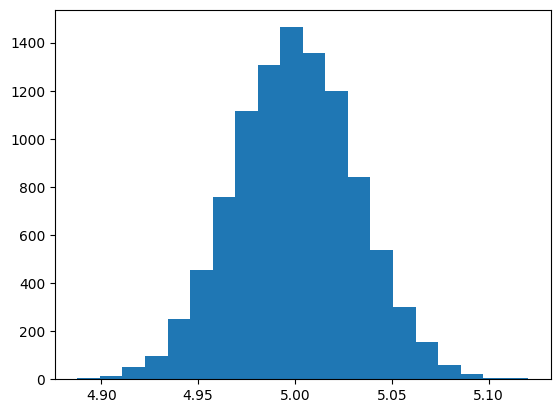

In [10]:
plt.hist(beta1, bins = 20)
plt.show()

> $\hat{β_1}$の分布はおおむね$N(5,0.0318^2)$となる。

### 5.3.3 回帰係数のt検定

1. 単回帰モデル$Y = β_0 + β_1X + ε$の係数$β_1$について、帰無仮説を$H_0:β_1$ = $0$、対立仮説を$H_1:β_1$ != $0$とする。
2. OLS推定量$\hat{β_1}$と、標準偏差$σ_n$を計算。
3. $t_n = \frac{\hat{β_1}}{σ_n}$として、$|t_n| > 1.96$であれば、有意水準5％で帰無仮説を棄却する。

### 5.3.4 p値による回帰係数の検定

1. 単回帰モデル$Y = β_0 + β_1X + ε$の係数$β_1$について、帰無仮説を$H_0:β_1$ = $0$、対立仮説を$H_1:β_1$ != $0$とする。
2. OLS推定量$\hat{β_1}$と、標準偏差$σ_n$を計算。
3. $t_n = \frac{\hat{β_1}}{σ_n}$を計算。
4. $N(0,1)$に従う確率変数$z$について、$|z| > |t_n|$となる確率を計算する。この値が小さいほど、帰無仮説を棄却することが容易。

### 5.3.6 pythonによる分析例

\begin{equation}
log(wage) = β_0 + β_{educ}educ + β_{exper}exper + ε
\end{equation}

In [2]:
wagedata = pd.read_csv('/content/drive/MyDrive/応用マクロゼミ/wage.csv')

# 目的変数を対数に変換することで、係数を変化率として解釈できる
wagedata['log_wage'] = np.log(wagedata['wage'])

result = ols('log_wage ~ educ + exper', data = wagedata).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     333.0
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.32e-131
Time:                        07:39:59   Log-Likelihood:                -1524.1
No. Observations:                3010   AIC:                             3054.
Df Residuals:                    3007   BIC:                             3072.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6660      0.064     73.147      0.0

In [9]:
print(f't値:', 0.0932 / 0.004, '> 1.96')
print('p値: 0.000 ')

t値: 23.3 > 1.96
p値: 0.000 


> ある人の教育年数と経験年数を知ることができれば、その人の賃金を予測するのに役立つと結論できる。

## 5.4 信頼区間

* $信頼区間 = 点推定値 + or - (z * 標準誤差)$  
  今回の例では...$信頼区間 = \hat{β_k} + or - (1.96σ_{nk})$  
* 信頼区間の解釈：  
  ×（間違い）「95％の確率で$0.086\leqμ\leq0.100$」  
  〇（正しい）「100回に95回の割合で母平均を含む推定をしたら$0.086\leqμ\leq0.100$と求まった。この範囲に母平均が含まれていると信頼することには一定の合理性がある。」  

In [10]:
betahat = result.params
sigma = result.bse

lower = betahat - 1.96 * sigma
upper = betahat + 1.96 * sigma
pd.concat([lower, upper], axis = 1)

,0,1
Intercept,4.541006,4.791063
educ,0.086089,0.100247
exper,0.036082,0.045233


In [11]:
# 信頼区間 = 1 - 有意水準 = 1 - alpha
result.conf_int(alpha = 0.05)

,0,1
Intercept,4.540958,4.791111
educ,0.086086,0.100250
exper,0.036080,0.045235


In [12]:
result.conf_int(alpha = 0.01)

,0,1
Intercept,4.501618,4.830451
educ,0.083859,0.102477
exper,0.034641,0.046674
